In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/hierarchical-clustering.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#shape of the dataset
df.shape

(200, 5)

In [ ]:
#describe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#null values
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#feature extraction
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

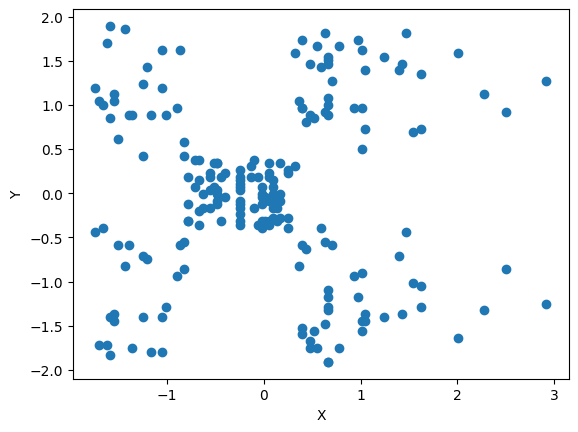

In [ ]:
#plotting the data in 2d plane
plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

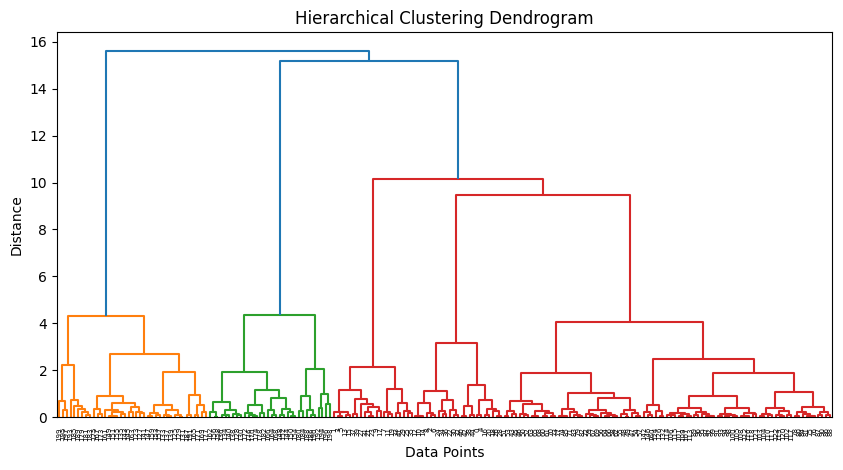

In [ ]:
#plottting the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z= linkage(X_scaled,method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [ ]:
#apply the k means clustering on this data and find the suelette score
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
kmlabels=km.fit_predict(X)

In [ ]:
X["kmlabel"]=kmlabels

/tmp/ipython-input-3659082676.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X

,Annual Income (k$),Spending Score (1-100),kmlabel
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


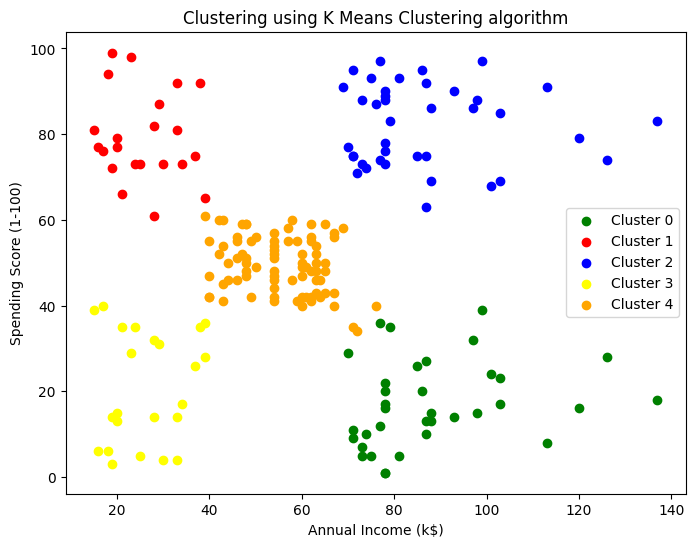

In [ ]:

plt.figure(figsize=(8, 6))

plt.scatter(X.iloc[:, 0][X["kmlabel"] == 0], X.iloc[:, 1][X["kmlabel"] == 0],
            color="green", label="Cluster 0")

plt.scatter(X.iloc[:, 0][X["kmlabel"] == 1], X.iloc[:, 1][X["kmlabel"] == 1],
            color="red", label="Cluster 1")

plt.scatter(X.iloc[:, 0][X["kmlabel"] == 2], X.iloc[:, 1][X["kmlabel"] == 2],
            color="blue", label="Cluster 2")

plt.scatter(X.iloc[:, 0][X["kmlabel"] == 3], X.iloc[:, 1][X["kmlabel"] == 3],
            color="yellow", label="Cluster 3")

plt.scatter(X.iloc[:, 0][X["kmlabel"] == 4], X.iloc[:, 1][X["kmlabel"] == 4],
            color="orange", label="Cluster 4")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering using K Means Clustering algorithm")
plt.legend()
plt.show()


In [ ]:
#calculating the silhouette_score for kmeans clustering
from sklearn.metrics import silhouette_score
print("silhouette_score for k means clustering algorithm: ",silhouette_score(X,X["kmlabel"]))

silhouette_score for k means clustering algorithm:  0.5553340370185542


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=5,linkage="ward")
aglabels=agc.fit_predict(X)

In [ ]:
X["aglabel"]=aglabels

/tmp/ipython-input-468117080.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X

,Annual Income (k$),Spending Score (1-100),kmlabel,aglabel
0,15,39,3,4
1,15,81,4,3
2,16,6,3,4
3,16,77,4,3
4,17,40,3,4
...,...,...,...,...
195,120,79,2,2
196,126,28,1,0
197,126,74,2,2
198,137,18,1,0


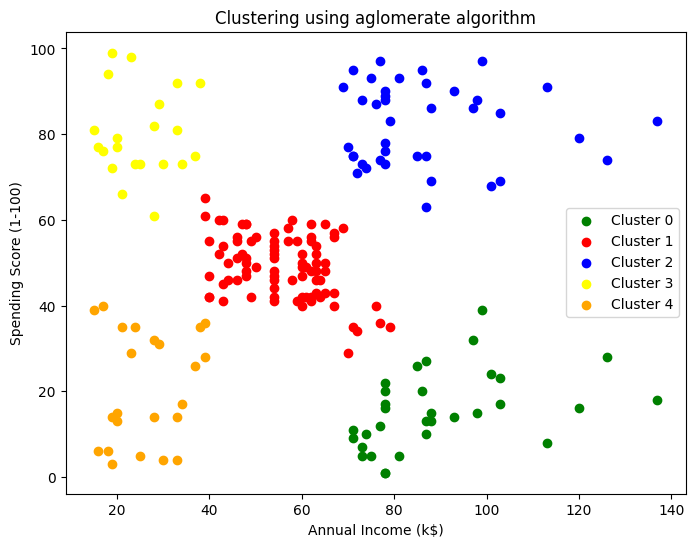

In [ ]:

plt.figure(figsize=(8, 6))

plt.scatter(X.iloc[:, 0][X["aglabel"] == 0], X.iloc[:, 1][X["aglabel"] == 0],
            color="green", label="Cluster 0")

plt.scatter(X.iloc[:, 0][X["aglabel"] == 1], X.iloc[:, 1][X["aglabel"] == 1],
            color="red", label="Cluster 1")

plt.scatter(X.iloc[:, 0][X["aglabel"] == 2], X.iloc[:, 1][X["aglabel"] == 2],
            color="blue", label="Cluster 2")

plt.scatter(X.iloc[:, 0][X["aglabel"] == 3], X.iloc[:, 1][X["aglabel"] == 3],
            color="yellow", label="Cluster 3")

plt.scatter(X.iloc[:, 0][X["aglabel"] == 4], X.iloc[:, 1][X["aglabel"] == 4],
            color="orange", label="Cluster 4")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.title("Clustering using aglomerate algorithm")
plt.show()


In [ ]:
#calculating the silhouette_score for kmeans clustering
from sklearn.metrics import silhouette_score
print("silhouette_score for k means clustering algorithm: ",silhouette_score(X,X["aglabel"]))

silhouette_score for k means clustering algorithm:  0.5547675221686781


In [ ]:
class CustomAgglomerativeClustering:
  def __init__(self, n_clusters=2, linkage="ward"):
      valid = ["single", "complete", "average", "ward"]
      if linkage not in valid:
          raise ValueError("Linkage must be one of: single, complete, average, ward")

      self.n_clusters = n_clusters
      self.linkage = linkage

  def euclidean_distance(self,point1,point2):

    return np.sqrt(np.sum((point1 - point2) ** 2))

  def compute_cluster_distance(self, cluster_a, cluster_b, dist_matrix, X):

    """Computes distance between clusters based on linkage"""

    if self.linkage == "single":
        return min(dist_matrix[a][b] for a in cluster_a for b in cluster_b)

    elif self.linkage == "complete":
        return max(dist_matrix[a][b] for a in cluster_a for b in cluster_b)

    elif self.linkage == "average":
        distances = [dist_matrix[a][b] for a in cluster_a for b in cluster_b]
        return sum(distances) / len(distances)

    elif self.linkage == "ward":
        # sizes
        nA = len(cluster_a)
        nB = len(cluster_b)

        # centroids
        meanA = np.mean(X[cluster_a], axis=0)
        meanB = np.mean(X[cluster_b], axis=0)

        # squared euclidean distance between centroids
        centroid_dist_sq = np.sum((meanA - meanB)**2)

        # Ward distance formula
        return (nA * nB) / (nA + nB) * centroid_dist_sq

  def fit_predict(self, X_df):

    X = X_df.values
    n_samples = X.shape[0]

    # Step 1: each point its own cluster
    clusters = [[i] for i in range(n_samples)]

    # Step 2: pairwise distance matrix
    dist_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            d = self.euclidean_distance(X[i], X[j])
            dist_matrix[i][j] = dist_matrix[j][i] = d

    # Step 3: keep merging until desired number of clusters
    while len(clusters) > self.n_clusters:

        min_dist = float("inf")
        p1 = p2 = -1

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                d = self.compute_cluster_distance(clusters[i], clusters[j], dist_matrix, X)
                if d < min_dist:
                    min_dist = d
                    p1, p2 = i, j

        # merge clusters p2 into p1
        clusters[p1] += clusters[p2]
        clusters.pop(p2)
    labels = np.zeros(X.shape[0], dtype=int)
    for i in range(len(clusters)):
        for idx in clusters[i]:
            labels[idx] = i

    return labels


In [ ]:
cag=CustomAgglomerativeClustering(n_clusters=5)
clusters=cag.fit_predict(X)

In [ ]:
#calculate the silhouette_score custom agglomerative algorithm
from sklearn.metrics import silhouette_score
print("silhouette_score for k means clustering algorithm: ",silhouette_score(X,clusters))

silhouette_score for k means clustering algorithm:  0.5547675221686781


In [ ]:
X["label"]=clusters

In [ ]:
X

,Annual Income (k$),Spending Score (1-100),kmlabel,aglabel,label
0,15,39,3,4,0
1,15,81,4,3,1
2,16,6,3,4,0
3,16,77,4,3,1
4,17,40,3,4,0
...,...,...,...,...,...
195,120,79,2,2,3
196,126,28,1,0,4
197,126,74,2,2,3
198,137,18,1,0,4


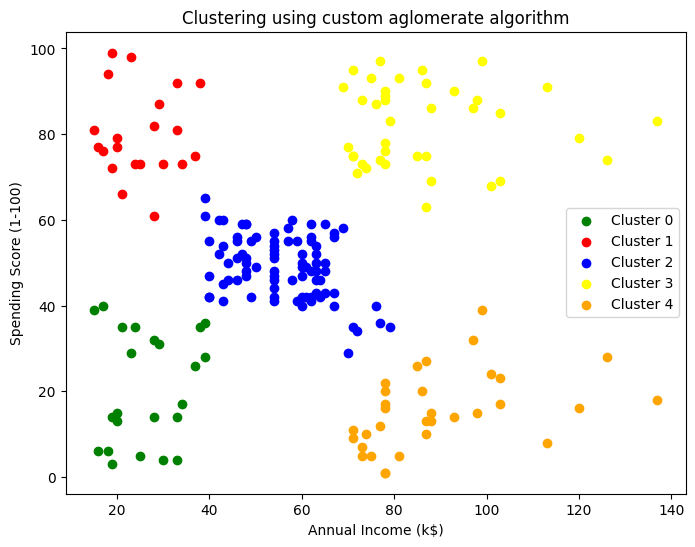

In [ ]:

plt.figure(figsize=(8, 6))

plt.scatter(X.iloc[:, 0][X["label"] == 0], X.iloc[:, 1][X["label"] == 0],
            color="green", label="Cluster 0")

plt.scatter(X.iloc[:, 0][X["label"] == 1], X.iloc[:, 1][X["label"] == 1],
            color="red", label="Cluster 1")

plt.scatter(X.iloc[:, 0][X["label"] == 2], X.iloc[:, 1][X["label"] == 2],
            color="blue", label="Cluster 2")

plt.scatter(X.iloc[:, 0][X["label"] == 3], X.iloc[:, 1][X["label"] == 3],
            color="yellow", label="Cluster 3")

plt.scatter(X.iloc[:, 0][X["label"] == 4], X.iloc[:, 1][X["label"] == 4],
            color="orange", label="Cluster 4")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.title("Clustering using custom aglomerate algorithm")
plt.show()


#**Working with the 3d data**

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import plotly.express as px
import pandas as pd

# 1. Generate clean 3D cluster data
X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    n_features=3,
    random_state=42
)

# 2. Generate random noise points
noise_points = np.random.uniform(
    low=-15, high=15, size=(40, 3)   # 40 noise/outlier points
)

# 3. Combine the original data with noise
X_noisy = np.vstack([X, noise_points])

# 4. Create labels (original clusters + noise = -1)
labels = np.hstack([y, np.full(len(noise_points), -1)])

# 5. Create DataFrame for Plotly
df = pd.DataFrame(X_noisy, columns=["Feature 1", "Feature 2", "Feature 3"])

In [ ]:

# # Plot using Plotly
fig = px.scatter_3d(
    df,
    x="Feature 1",
    y="Feature 2",
    z="Feature 3",
    # color="blue",
    opacity=0.8,
    # symbol="label",
    title="3D Dataset for Agglomerative Clustering (Plotly)"
)

fig.update_traces(marker=dict(size=5))
fig.show()


In [ ]:
df

,Feature 1,Feature 2,Feature 3
0,-9.391977,6.125645,3.987025
1,-3.730041,9.223150,2.680209
2,4.145029,-8.399917,11.925129
3,-1.555196,9.665677,4.324610
4,1.343534,9.585177,5.775444
...,...,...,...
335,11.939921,6.897125,11.684586
336,-13.176065,6.868811,-2.063120
337,5.874917,-11.031462,-8.173515
338,-7.312030,-2.406984,-3.828221


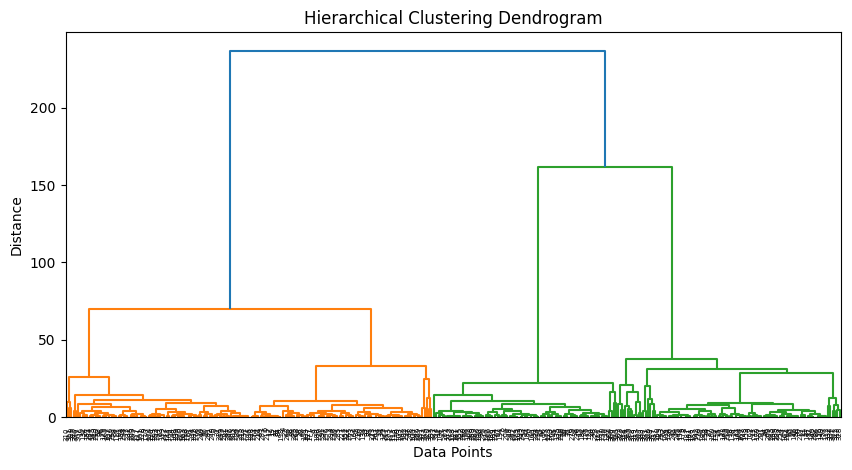

In [ ]:
#plottting the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z= linkage(df,method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [ ]:
#apply the k means clustering algorithm
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,max_iter=100)
labels=km.fit_predict(df)
#calculate the silhouette_score
from sklearn.metrics import silhouette_score
print("silhouette_score for k means clustering algorithm: ",silhouette_score(df,labels))

silhouette_score for k means clustering algorithm:  0.7236632182779336


In [ ]:
len(labels)

340

In [ ]:
df["kmlabel"]=labels

In [ ]:
#apply agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,linkage="ward")
labels=agg.fit_predict(df)
#calculate the silhouette_score
from sklearn.metrics import silhouette_score
print("silhouette_score for k means clustering algorithm: ",silhouette_score(df,labels))

silhouette_score for k means clustering algorithm:  0.7176163277223644


In [ ]:
df["aglabel"]=labels

In [ ]:
#plot the data with labels

# # Plot using Plotly
fig = px.scatter_3d(
    df,
    x="Feature 1",
    y="Feature 2",
    z="Feature 3",
    color="kmlabel",
    opacity=0.8,
    symbol="kmlabel",
    title="3D Dataset for Kmeans clustering Clustering (Plotly)"
)

fig.update_traces(marker=dict(size=5))
fig.show()


In [ ]:
#plot the data with labels

# # Plot using Plotly
fig = px.scatter_3d(
    df,
    x="Feature 1",
    y="Feature 2",
    z="Feature 3",
    color="aglabel",
    opacity=0.8,
    symbol="aglabel",
    title="3D Dataset for Agglomerative Clustering (Plotly)"
)

fig.update_traces(marker=dict(size=5))
fig.show()
